In [1]:

#https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6



import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [16]:
# Load the Diabetes Housing dataset
import requests
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
s=requests.get(url).content
diabetes = pd.read_csv(s) # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /jbrownlee/Datasets/master/pima-indians-diabetes.data.csv (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f73820e2210>: Failed to establish a new connection: [Errno -2] Name or service not known',))

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(353, 10) (353,)
(89, 10) (89,)


In [4]:
# fit a model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [5]:
predictions[0:5]

array([127.61674135, 111.50595274,  84.45050648, 154.18400914,
       200.6041883 ])

Text(0,0.5,'Predictions')

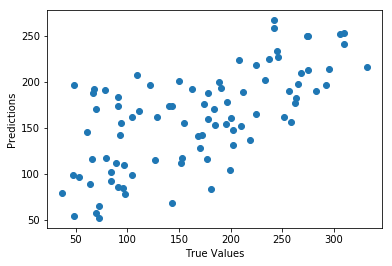

In [6]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [7]:
print 'Score:', model.score(X_test, y_test)

Score: 0.43570204052803274


In [8]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 

KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [9]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
#('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
#('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))


In [10]:
#from sklearn.model_selection import LeaveOneOut 
#X = np.array([[1, 2], [3, 4]])
#y = np.array([1, 2])
#loo = LeaveOneOut()
#loo.get_n_splits(X)


#for train_index, test_index in loo.split(X):
#    print("TRAIN:", train_index, "TEST:", test_index)
#    X_train, X_test = X[train_index], X[test_index]
#    y_train, y_test = y[train_index], y[test_index]
#    print(X_train, X_test, y_train, y_test)

In [11]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/home/diptam/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
df.shape

(442, 10)

In [15]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ('Cross-validated scores:', scores)

ValueError: Found input variables with inconsistent numbers of samples: [442, 4]

In [ ]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics